# Assigment 3
This assigment focuses on getting comfortable with working with multidimensional data and linear regression.
Key items include:
- Creating random n-dimensional data
- Creating a Model that can handle the data
- Plot a subset of the data along with the prediction
- Using a Dataset to read in and choose certain columns to produce a model
- Create several models from various combinations of columns
- Plot a few of the results

In [7]:
# Loading packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Create a 4 dimensional data set with 64 elements and show all 4 scatter 2D plots of the data $x_1$ vs. $y$, $x_2$ vs. $y$,  $x_3$ vs. $y$, $x_4$ vs. $y$

In [25]:
# Creating 4-dimensional dataset with 64 elements 
np.random.seed(33)  # For reproducibility
n = 64

x = np.linspace(0,1,n) + np.random.rand(4, n)
x = np.vstack([x, np.ones(len(x.T))]).T

y = np.linspace(0,1,n) + np.random.rand(n) - 1

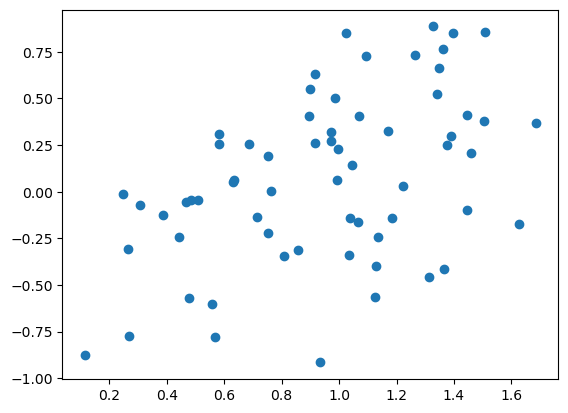

In [26]:
# x1 vs. y
plt.scatter(x.T[0], y)

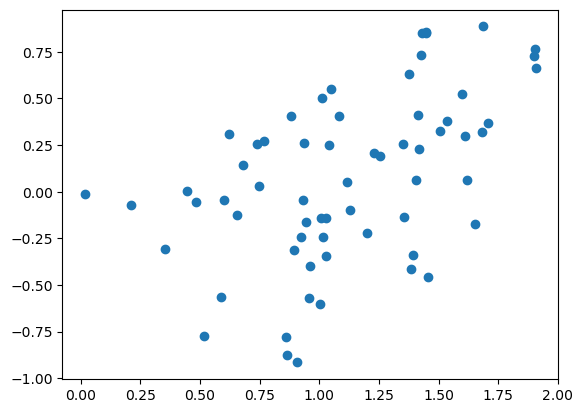

In [22]:
# x2 vs. y
plt.scatter(x.T[1], y)

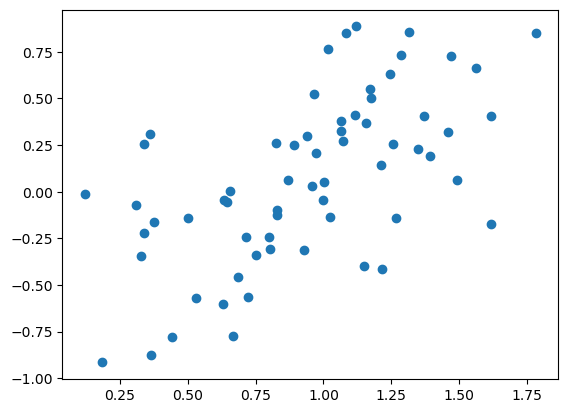

In [23]:
# x3 vs. y
plt.scatter(x.T[2], y)

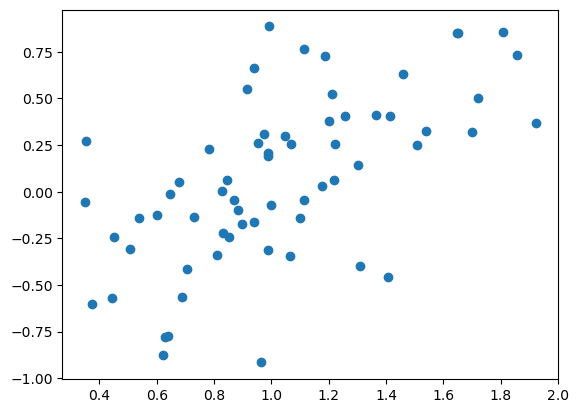

In [24]:
# x4 vs. y
plt.scatter(x.T[3], y)

## 2.  Create a Linear Regression model (LIKE WE DID IN CLASS) to fit the data. *Use the example from Lesson 3 and DO NOT USE a library that calculates automatically*. We are expecting 5 coefficients to describe the linear model. 

## After creating the model (finding the coefficients), calculate a new column $y_p=\Sigma\beta_n\cdot x_n$ 

In [39]:
# Finding coefficients
left = np.linalg.inv(np.dot(x.T,x))
right = np.dot(y.T, x)
np.dot(left,right)

array([-0.02421962,  0.09554617,  0.4453871 ,  0.48721701, -0.93227561])

In [43]:
# Another way to find coefficients
beta = np.linalg.lstsq(x,y,rcond=-1)[0]
beta

array([-0.02421962,  0.09554617,  0.4453871 ,  0.48721701, -0.93227561])

In [48]:
# Predicting values of y
pred = np.dot(x, beta)
pred

array([-0.56745465, -0.43915582, -0.27907147, -0.29446161, -0.31541785,
       -0.30042673, -0.38672665, -0.24311076, -0.18798004, -0.06569897,
       -0.24628076, -0.35908266, -0.28044949, -0.38757113, -0.21690155,
        0.10872896, -0.12914151, -0.21194393, -0.1326253 , -0.27893707,
       -0.10167363, -0.2513246 , -0.23304064, -0.15016034,  0.26235148,
       -0.39995731,  0.05185371,  0.1010301 ,  0.2819074 , -0.0358975 ,
       -0.06040237,  0.1669894 , -0.09386495,  0.02773308,  0.35199497,
        0.2634803 ,  0.28136624,  0.26968365,  0.11383764,  0.06469109,
        0.16012043,  0.17865033,  0.26483272, -0.0076004 ,  0.40698894,
        0.32946217,  0.23776233,  0.50201277,  0.5552791 , -0.03318579,
        0.11623091,  0.68280885,  0.3430978 ,  0.20837771,  0.44305758,
        0.65116065,  0.63595341,  0.455077  ,  0.37046502,  0.46759004,
        0.64168786,  0.21247587,  0.17786747,  0.76648585])

## 3. Plot the model's prediction as a different color on top of the scatter plot from Q1 in 2D for all 4 of the dimensions ($x_1 \rightarrow y_p, x_2 \rightarrow y_p, x_3 \rightarrow y_p, x_4 \rightarrow y_p$) 

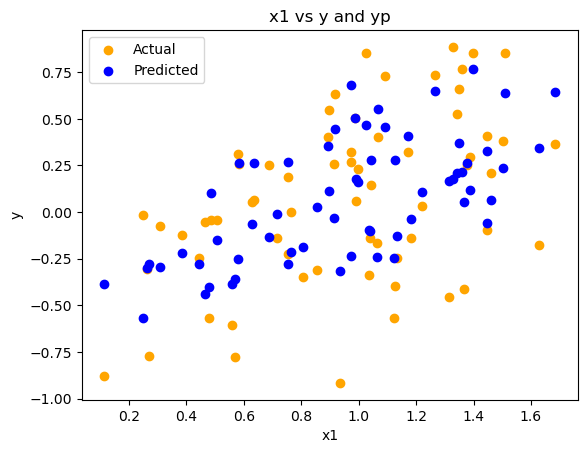

In [57]:
# x1 vs. y & yp
plt.scatter(x.T[0], y, c='orange', label = "Actual")
plt.scatter(x.T[0], pred, c='blue', label = "Predicted")
plt.xlabel('x1')
plt.ylabel('y')
plt.title('x1 vs y and yp')
plt.legend()

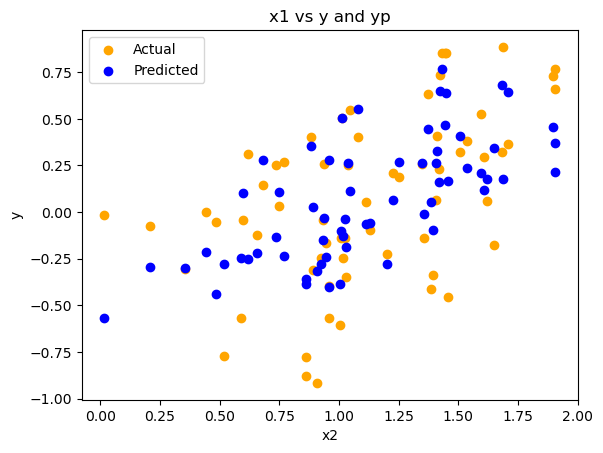

In [58]:
# x2 vs. y & yp
plt.scatter(x.T[1], y, c='orange', label = "Actual")
plt.scatter(x.T[1], pred, c='blue', label = "Predicted")
plt.xlabel('x2')
plt.ylabel('y')
plt.title('x1 vs y and yp')
plt.legend()

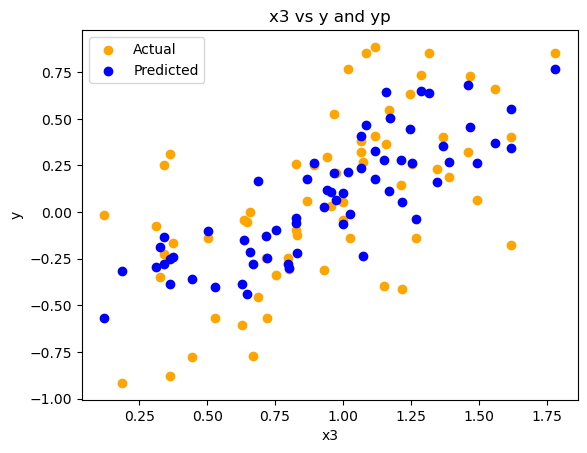

In [59]:
# x3 vs. y & yp
plt.scatter(x.T[2], y, c='orange', label = "Actual")
plt.scatter(x.T[2], pred, c='blue', label = "Predicted")
plt.xlabel('x3')
plt.ylabel('y')
plt.title('x3 vs y and yp')
plt.legend()

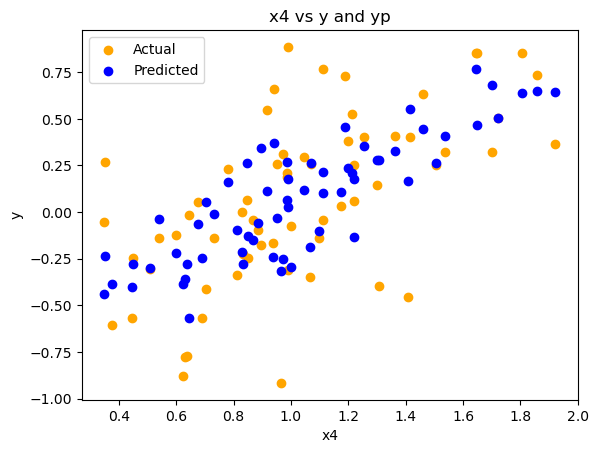

In [60]:
# x4 vs. y & yp
plt.scatter(x.T[3], y, c='orange', label = "Actual")
plt.scatter(x.T[3], pred, c='blue', label = "Predicted")
plt.xlabel('x4')
plt.ylabel('y')
plt.title('x4 vs y and yp')
plt.legend()

## 4. Read in `mlnn/data/Credit.csv` with Pandas and build a Linear Regression model to predict Credit Rating (`Rating`). Use only the numeric columns in your model, but feel free to experiment which which columns you believe are better predicters of Credit Rating (Column `Rating`)

In [5]:
import pandas as pd
import numpy as np
credit = pd.read_csv('Credit.csv')
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


## Choose multiple columns as inputs beyond `Income` and `Limit` but clearly, don't use `Rating`

In [61]:
columns = ['Income', 'Limit', 'Age', 'Education', 'Balance']
X = credit[columns].values

X = np.vstack([X.T, np.ones(len(X))]).T
X

array([[1.48910e+01, 3.60600e+03, 3.40000e+01, 1.10000e+01, 3.33000e+02,
        1.00000e+00],
       [1.06025e+02, 6.64500e+03, 8.20000e+01, 1.50000e+01, 9.03000e+02,
        1.00000e+00],
       [1.04593e+02, 7.07500e+03, 7.10000e+01, 1.10000e+01, 5.80000e+02,
        1.00000e+00],
       ...,
       [5.78720e+01, 4.17100e+03, 6.70000e+01, 1.20000e+01, 1.38000e+02,
        1.00000e+00],
       [3.77280e+01, 2.52500e+03, 4.40000e+01, 1.30000e+01, 0.00000e+00,
        1.00000e+00],
       [1.87010e+01, 5.52400e+03, 6.40000e+01, 7.00000e+00, 9.66000e+02,
        1.00000e+00]])

In [62]:
y = credit['Rating']
y

0      283
1      483
2      514
3      681
4      357
      ... 
395    307
396    296
397    321
398    192
399    415
Name: Rating, Length: 400, dtype: int64

In [64]:
beta2 = np.linalg.lstsq(X,y,rcond=-1)[0]
beta2

pred2 = np.dot(X, beta2)
pred2

array([277.53859614, 488.6059157 , 511.45574486, 674.01879394,
       363.10792782, 578.26257737, 262.48307715, 515.15061719,
       257.95174726, 498.93842097, 581.35674608, 128.12325543,
       392.91883044, 501.40136224, 256.22703539, 204.88937408,
       283.56484755, 329.00213929, 464.94219261, 482.00022922,
       226.74075886, 462.79450126, 213.3801447 , 385.15320316,
       155.58650495, 325.41450446, 287.21610228, 338.61807515,
       935.65754446, 412.3850226 , 419.53969793, 218.27598228,
       560.86133988, 163.66120083, 211.77294839, 214.50958334,
       469.96353754, 472.82706423, 298.52078734, 267.85466244,
       258.05335006, 556.3774445 , 354.96039997, 454.75771693,
       462.99928873, 544.07184545, 381.10670713, 339.245888  ,
       191.51797648, 350.01008639, 383.05163357, 298.35495832,
       400.00369957, 404.98564654, 141.78797574, 162.84152926,
       353.963675  , 356.00640027, 268.15713469, 390.53612265,
       381.34908562, 243.76752818, 156.24745563, 235.61

### 5. Plot your results using scatter plots (just like in class). Show as many of your columns vs. credit rating that you can.

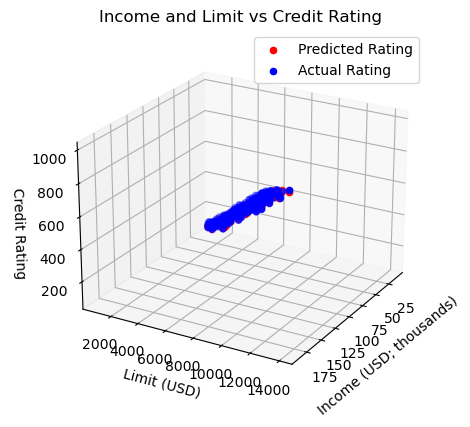

In [71]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(23, 30)
ax.scatter(X.T[0], X.T[1], pred2, zdir='z', c='r', label='Predicted Rating')
ax.scatter(X.T[0], X.T[1], y, zdir='z', c='b', label='Actual Rating')
ax.set_xlabel('Income (USD; thousands)')
ax.set_ylabel('Limit (USD)')
ax.set_zlabel('Credit Rating')
plt.legend()
plt.title('Income and Limit vs Credit Rating')
plt.show()

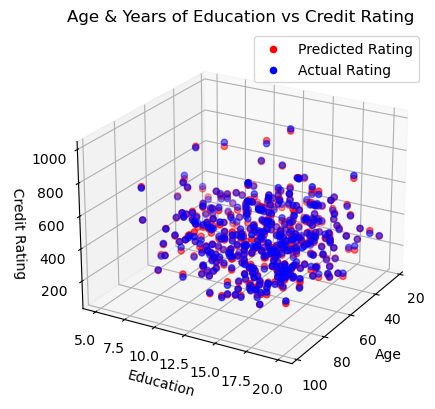

In [67]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(23, 30)
ax.scatter(X.T[2], X.T[3], pred2, zdir='z', c='r', label='Predicted Rating')
ax.scatter(X.T[2], X.T[3], y, zdir='z', c='b', label='Actual Rating')
ax.set_xlabel('Age')
ax.set_ylabel('Education')
ax.set_zlabel('Credit Rating')
plt.legend()
plt.title('Age & Years of Education vs Credit Rating')
plt.show()

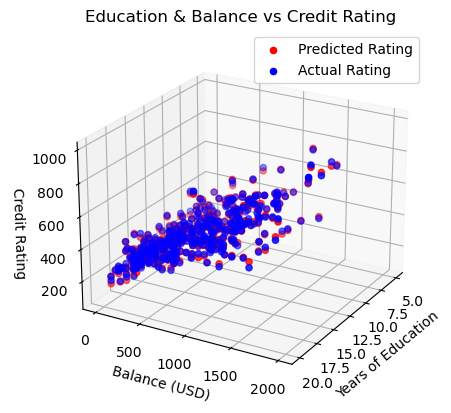

In [72]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(23, 30)
ax.scatter(X.T[3], X.T[4], pred2, zdir='z', c='r', label='Predicted Rating')
ax.scatter(X.T[3], X.T[4], y, zdir='z', c='b', label='Actual Rating')
ax.set_xlabel('Years of Education')
ax.set_ylabel('Balance (USD)')
ax.set_zlabel('Credit Rating')
plt.legend()
plt.title('Education & Balance vs Credit Rating')
plt.show()